In [15]:
import nltk
from nltk.corpus.reader import CHILDESCorpusReader
import numpy as np
import pandas as pd
from nltk.probability import FreqDist
from pandas import DataFrame  
import matplotlib.pyplot as plt
corpus = nltk.data.find('/Users/Ershui13/nltk_data/corpora/childescorpus/')
pronounlist=['I', 'me', 'you', 'he' ,'him', 'she', 'her', 'we', 'us', 'they', 'them', 'it']
pronounlistmin=['I', 'me','he' ,'him', 'she', 'her', 'we', 'us', 'they', 'them']
pronounerrorlist = [('I', 'OBJ'),('I', 'POBJ'),('he', 'OBJ'),('he', 'POBJ'),('she', 'OBJ'),('she', 'POBJ'),('we', 'OBJ'),('we', 'POBJ'),('they', 'OBJ'),('they', 'POBJ'),('me', 'SUBJ'),('him', 'SUBJ'),('her','SUBJ')]

In [32]:
def errorsents(child,fileid):
    tagsenti=child.tagged_sents(fileid, relation = True, speaker = ['CHI'])
    num = len(child.sents(fileid))
    taglist=[] 
    taglist.append(tagsenti[:num])
    for tag in taglist:
        for w in pronounlistmin:
            if w in tag:
                taglist.append(tag)
    return taglist
def errorlist(child,fileid):
    countlist = []
    nnlist = []
    taglist = errorsents(child,fileid)
    for sent in taglist:
        for ss in sent:
            for nn in ss:
                for w in pronounlistmin:
                    if w in nn:
                        nnlist.append(nn)
    for n in nnlist:
        nlist=list(n)
        del nlist[1]
        a = tuple(i.split("|")[-1] for i in nlist)
        countlist.append(a)
    return countlist
def errornum(child,fileid):
    countlist = errorlist(child,fileid)
    errorcountlist=[countlist.count(er) for er in pronounerrorlist]
    return errorcountlist
def errornumlist(child,fileid):
    countlist = errorlist(child,fileid)
    errorcountlist=[countlist.count(er) for er in pronounerrorlist]
    return errorcountlist

In [12]:
def totalpronoun(child,fileid):
    freqdist = FreqDist(child.words(fileid,speaker= ['CHI']))  
    totalpronoun = [freqdist[i] for i in pronounlist ]
    return totalpronoun
def totalpronounmin(child,fileid):
    freqdist = FreqDist(child.words(fileid,speaker= ['CHI']))  
    totalpronounmin = [freqdist[t] for t in pronounlistmin]
    return totalpronounmin

In [22]:
def ageplot(child_table):
    plt.plot(child_table['age'], child_table['%error'], '.')
    return plt.show()
def mluplot(child_table):
    plt.plot(child_table['mlu'], child_table['%error'], '.')
    return plt.show()

# Peter

In [4]:
Peter = CHILDESCorpusReader(corpus, 'Bloom70/Peter/.*.xml')
Peteralldata=[]
for fileid in Peter.fileids():
    Peterdata=[Peter.age(fileid, month=True)[0],Peter.MLU(fileid)[0],len(Peter.words(fileid, speaker=['CHI'])),sum(totalpronoun(fileid)),sum(totalpronounmin(fileid)),sum(errornum(fileid))]
    Peteralldata.append(Peterdata)
from pandas import DataFrame  
df = DataFrame(Peteralldata)
df.columns = ['age', 'mlu', '#words','#pronouns','#cased_pronoun','#errors']

### mlu table

In [20]:
df['%error'] = (df['#errors']/df['#cased_pronoun'])
df['group'] = df['age']
df.sort_values('mlu')


,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
3,23,1.465116,1342,30,4,0,0.000000,23
1,22,1.873874,273,5,0,0,NaN,22
0,21,2.036982,1640,18,1,0,0.000000,21
9,27,2.804245,2663,161,63,2,0.031746,27
4,24,2.979466,1665,82,7,0,0.000000,24
5,24,3.089770,3152,86,16,0,0.000000,24
2,22,3.208686,3257,55,2,0,0.000000,22
7,26,3.966805,3929,210,94,17,0.180851,26
6,25,4.078723,4014,114,31,6,0.193548,25
10,28,4.249158,2749,170,85,3,0.035294,28


In [51]:
df.to_csv('Peter.csv', sep='\t')

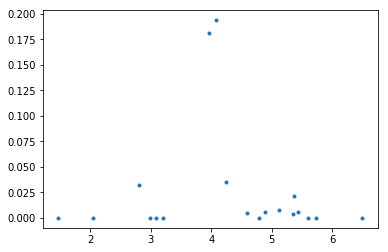

In [23]:
mluplot(df)

### age table

In [10]:
df1 = df.groupby(df['group']).sum()
df1['age'] = df['age'].groupby(df['group']).mean()
df1['mlu'] = df['mlu'].groupby(df['group']).mean()
df1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
21,21,2.036982,1640,18,1,0,0.000000
22,22,2.541280,3530,60,2,0,0.000000
23,23,1.465116,1342,30,4,0,0.000000
24,24,3.034618,4817,168,23,0,0.000000
25,25,4.078723,4014,114,31,6,0.193548
26,26,4.665386,8495,454,231,20,0.202749
27,27,2.804245,2663,161,63,2,0.031746
28,28,4.415788,8711,635,313,4,0.039680
29,29,4.787283,4464,337,201,0,0.000000


In [53]:
df1.to_csv('Peter.csv', mode='a', header=True)

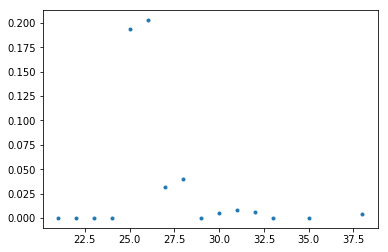

In [39]:
ageplot(df1)

# Allison

In [33]:
Allison = CHILDESCorpusReader(corpus, 'Bloom73/.*.xml')
Allisonalldata=[]
for fileid in Allison.fileids():
    Allisondata=[Allison.age(fileid, month=True)[0],Allison.MLU(fileid)[0],len(Allison.words(fileid, speaker=['CHI'])),sum(totalpronoun(Allison,fileid)),sum(totalpronounmin(Allison,fileid)),sum(errornum(Allison,fileid))]
    Allisonalldata.append(Allisondata)
from pandas import DataFrame  
Allison_table = DataFrame(Allisonalldata)
Allison_table.columns = ['age', 'mlu', '#words','#pronouns','#cased_pronoun','#errors']

In [34]:
Allison_table['%error'] = (Allison_table['#errors']/Allison_table['#cased_pronoun'])
Allison_table['group'] = Allison_table['age']
Allison_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
1,19,1.090551,401,0,0,0,NaN,19
2,21,1.214724,518,1,0,0,NaN,21
0,17,1.289474,546,0,0,0,NaN,17
3,22,1.798319,479,1,0,0,NaN,22
4,28,4.239496,994,126,87,0,0.000000,28
5,34,4.960000,1677,312,178,1,0.005618,34


In [55]:
Allison_table.to_csv('Allison.csv', sep='\t')

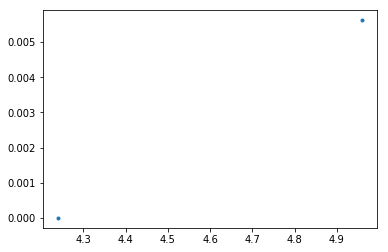

In [37]:
mluplot(Allison_table)

In [36]:
Allison_table1 = Allison_table.groupby(Allison_table['group']).sum()
Allison_table1['age'] = Allison_table['age'].groupby(Allison_table['group']).mean()
Allison_table1['mlu'] = Allison_table['mlu'].groupby(Allison_table['group']).mean()
Allison_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
17,17,1.289474,546,0,0,0,NaN
19,19,1.090551,401,0,0,0,NaN
21,21,1.214724,518,1,0,0,NaN
22,22,1.798319,479,1,0,0,NaN
28,28,4.239496,994,126,87,0,0.000000
34,34,4.960000,1677,312,178,1,0.005618


In [56]:
Allison_table1.to_csv('Allison.csv', mode='a', header=True)

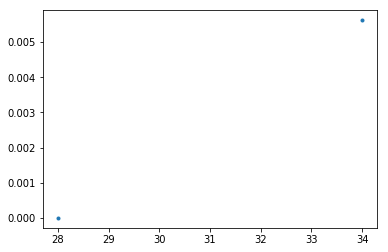

In [38]:
ageplot(Allison_table1)

# Laura

In [42]:
Laura = CHILDESCorpusReader(corpus,'Braunwald/.*.xml')
Lauraalldata=[]
for fileid in Laura.fileids():
    Lauradata=[Laura.age(fileid, month=True)[0],Laura.MLU(fileid)[0],len(Laura.words(fileid, speaker=['CHI'])),sum(totalpronoun(Laura,fileid)),sum(totalpronounmin(Laura,fileid)),sum(errornum(Laura,fileid))]
    Lauraalldata.append(Lauradata)
from pandas import DataFrame  
Laura_table = DataFrame(Lauraalldata)
Laura_table.columns = ['age', 'mlu', '#words','#pronouns','#cased_pronoun','#errors']

In [49]:
Laura_table['%error'] = (Laura_table['#errors']/Laura_table['#cased_pronoun'])
Laura_table['group'] = Laura_table['age']
Laura_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
25,19,1.000000,11,0,0,0,NaN,19
166,43,1.000000,2,0,0,0,NaN,43
0,18,1.150000,37,0,0,0,NaN,18
9,18,1.157895,71,8,8,0,0.000000,18
14,18,1.162791,66,0,0,0,NaN,18
24,19,1.250000,37,0,0,0,NaN,19
1,17,1.270270,193,5,2,0,0.000000,17
2,17,1.273333,261,9,4,0,0.000000,17
10,18,1.293333,179,2,0,0,NaN,18
27,19,1.300000,16,0,0,0,NaN,19


In [54]:
Laura_table.to_csv('Laura.csv', sep='\t')

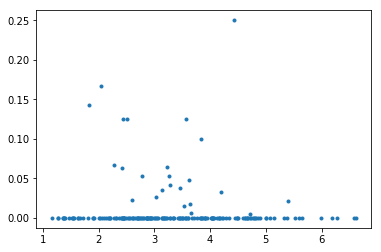

In [50]:
mluplot(Laura_table)

In [47]:
Laura_table1 = Laura_table.groupby(Laura_table['group']).sum()
Laura_table1['age'] = Laura_table['age'].groupby(Laura_table['group']).mean()
Laura_table1['mlu'] = Laura_table['mlu'].groupby(Laura_table['group']).mean()
Laura_table1['%error'] = (Laura_table1['#errors']/Laura_table1['#cased_pronoun'])

Laura_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
17,17,1.431705,815,26,13,0,0.000000
18,18,1.440619,1766,56,37,0,0.000000
19,19,1.822055,1314,69,52,1,0.019231
20,20,2.052602,887,49,30,0,0.000000
21,21,2.589964,1373,128,74,0,0.000000
22,22,2.216869,820,86,38,1,0.026316
23,23,2.753986,2438,212,141,1,0.007092
24,24,2.950023,2385,289,197,3,0.015228
25,25,2.756103,874,118,87,1,0.011494


In [57]:
Laura_table1.to_csv('Laura.csv', mode='a', header=True)

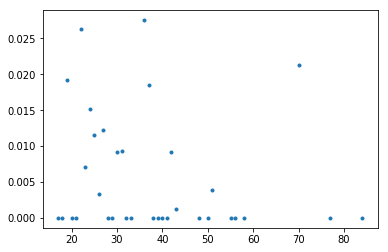

In [48]:
ageplot(Laura_table1)

# Adam

In [59]:
Adam = CHILDESCorpusReader(corpus, 'Brown/Adam/.*.xml')
Adamalldata=[]
for fileid in Adam.fileids():
    Adamdata=[Adam.age(fileid, month=True)[0],Adam.MLU(fileid)[0],len(Adam
   .words(fileid, speaker=['CHI'])),sum(totalpronoun(Adam
   ,fileid)),sum(totalpronounmin(Adam
   ,fileid)),sum(errornum(Adam
   ,fileid))]
    Adamalldata.append(Adamdata)
from pandas import DataFrame  
Adam_table = DataFrame(Adamalldata)
Adam_table.columns = ['age', 'mlu', '#words','#pronouns','#cased_pronoun','#errors']

In [60]:
Adam_table['%error'] = (Adam_table['#errors']/Adam_table['#cased_pronoun'])
Adam_table['group'] = Adam_table['age']
Adam_table.sort_values('mlu')
Adam_table.to_csv('Adam.csv', sep='\t')

In [62]:
Adam_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
3,28,2.400362,1563,41,17,0,0.000000,28
1,28,2.626943,2903,63,29,0,0.000000,28
0,27,2.647458,2803,77,37,1,0.027027,27
4,29,2.764881,2034,76,33,0,0.000000,29
2,28,2.924471,2126,54,15,0,0.000000,28
5,29,2.936378,1981,103,37,0,0.000000,29
12,33,3.073113,1388,88,23,0,0.000000,33
8,31,3.139154,2374,127,51,0,0.000000,31
11,33,3.200342,1954,126,83,0,0.000000,33
13,34,3.213964,1507,119,37,0,0.000000,34


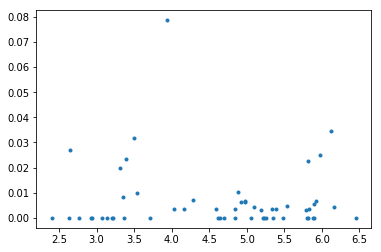

In [61]:
mluplot(Adam_table)

In [173]:
Adam_table1 = Adam_table.groupby(Adam_table['group']).sum()
Adam_table1['age'] = Adam_table['age'].groupby(Adam_table['group']).mean()
Adam_table1['mlu'] = Adam_table['mlu'].groupby(Adam_table['group']).mean()
Adam_table1['%error'] = (Adam_table1['#errors']/Adam_table1['#cased_pronoun'])
Adam_table1.to_csv('Adam.csv', mode='a', header=True)
Adam_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
27,27,2.647458,2803,77,37,1,0.027027
28,28,2.650592,6592,158,61,0,0.000000
29,29,2.850630,4015,179,70,0,0.000000
30,30,3.394118,2378,111,43,1,0.023256
31,31,3.404899,7127,434,198,0,0.000000
32,32,3.536481,2508,201,100,1,0.010000
33,33,3.136728,3342,214,106,0,0.000000
34,34,3.359614,3649,358,163,4,0.024540
35,35,3.532063,7035,1090,553,23,0.041591


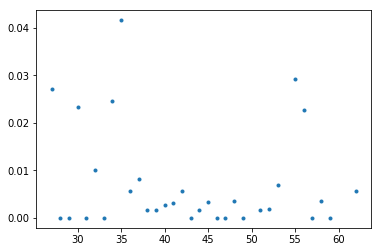

In [174]:
ageplot(Adam_table1)

# Eve

In [65]:
Eve = CHILDESCorpusReader(corpus, 'Brown/Eve/.*.xml')
Evealldata=[]
for fileid in Eve.fileids():
    Evedata=[Eve.age(fileid, month=True)[0],Eve.MLU(fileid)[0],len(Eve.words(fileid, speaker=['CHI'])),sum(totalpronoun(Eve,fileid)),sum(totalpronounmin(Eve,fileid)),sum(errornum(Eve,fileid))]
    Evealldata.append(Evedata)
from pandas import DataFrame  
Eve_table = DataFrame(Evealldata)
Eve_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [66]:
Eve_table['%error'] = (Eve_table['#errors']/Eve_table['#cased_pronoun'])
Eve_table['group'] = Eve_table['age']
Eve_table.to_csv('Eve.csv', sep='\t')
Eve_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
0,18,2.091873,1409,66,10,0,0.000000,18
1,18,2.100592,825,20,15,0,0.000000,18
3,19,2.133995,1052,27,13,0,0.000000,19
4,20,2.538618,1480,48,31,0,0.000000,20
2,19,2.592593,538,18,9,0,0.000000,19
6,21,2.841026,1221,44,27,0,0.000000,21
5,21,3.099490,1335,42,18,0,0.000000,21
7,21,3.225392,2495,146,87,0,0.000000,21
10,23,3.542373,1281,146,73,1,0.013699,23
8,22,3.674242,1532,102,64,2,0.031250,22


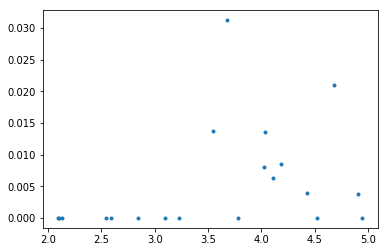

In [67]:
mluplot(Eve_table)

In [68]:
Eve_table1 = Eve_table.groupby(Eve_table['group']).sum()
Eve_table1['age'] = Eve_table['age'].groupby(Eve_table['group']).mean()
Eve_table1['mlu'] = Eve_table['mlu'].groupby(Eve_table['group']).mean()
Eve_table1
Eve_table1.to_csv('Eve.csv', mode='a', header=True)

In [70]:
Eve_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
18,18,2.096232,2234,86,25,0,0.000000
19,19,2.363294,1590,45,22,0,0.000000
20,20,2.538618,1480,48,31,0,0.000000
21,21,3.055303,5051,232,132,0,0.000000
22,22,3.725471,3133,195,124,2,0.031250
23,23,3.825002,3396,428,233,2,0.019949
24,24,4.103145,3032,434,242,2,0.016547
25,25,4.795315,4894,759,456,5,0.024716
26,26,4.688440,6092,888,542,1,0.003891


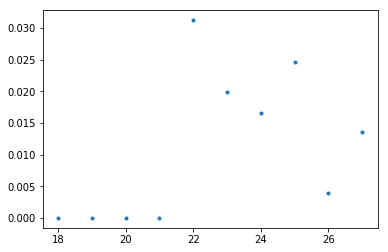

In [69]:
ageplot(Eve_table1)

# Sarah

In [71]:
Sarah = CHILDESCorpusReader(corpus, 'Brown/Sarah/.*.xml')
Sarahalldata=[]
for fileid in Sarah.fileids():
    Sarahdata=[Sarah.age(fileid, month=True)[0],Sarah.MLU(fileid)[0],len(Sarah.words(fileid, speaker=['CHI'])),sum(totalpronoun(Sarah,fileid)),sum(totalpronounmin(Sarah,fileid)),sum(errornum(Sarah,fileid))]
    Sarahalldata.append(Sarahdata)
from pandas import DataFrame  
Sarah_table = DataFrame(Sarahalldata)
Sarah_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [72]:
Sarah_table['%error'] = (Sarah_table['#errors']/Sarah_table['#cased_pronoun'])
Sarah_table['group'] = Sarah_table['age']
Sarah_table.to_csv('Sarah.csv', sep='\t')
Sarah_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
15,30,1.586667,272,12,9,0,0.000000,30
4,28,1.714286,291,23,16,0,0.000000,28
8,29,1.805128,404,28,23,0,0.000000,29
9,29,1.824841,709,43,35,0,0.000000,29
2,28,1.826471,659,9,7,0,0.000000,28
6,28,1.872587,518,10,10,0,0.000000,28
11,29,1.900000,534,69,55,0,0.000000,29
16,30,1.900783,797,65,50,0,0.000000,30
10,29,1.977358,600,40,32,0,0.000000,29
19,31,1.990385,474,44,30,0,0.000000,31


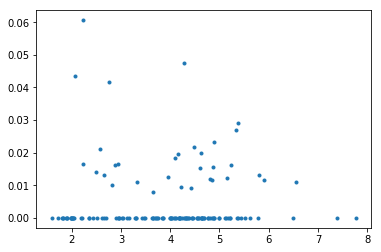

In [73]:
mluplot(Sarah_table)

In [175]:
Sarah_table1 = Sarah_table.groupby(Sarah_table['group']).sum()
Sarah_table1['age'] = Sarah_table['age'].groupby(Sarah_table['group']).mean()
Sarah_table1['mlu'] = Sarah_table['mlu'].groupby(Sarah_table['group']).mean()
Sarah_table1['%error'] = (Sarah_table1['#errors']/Sarah_table1['#cased_pronoun'])
Sarah_table1.to_csv('Sarah.csv', mode='a', header=True)
Sarah_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
27,27,2.044920,817,29,29,1,0.034483
28,28,1.943082,2907,124,104,0,0.000000
29,29,1.904041,2767,202,161,0,0.000000
30,30,2.003065,2053,165,114,0,0.000000
31,31,2.178303,2300,227,170,2,0.011765
32,32,2.323483,1550,149,95,0,0.000000
33,33,2.654791,3435,371,271,4,0.014760
34,34,2.753138,2950,467,326,4,0.012270
35,35,3.063434,1876,287,217,0,0.000000


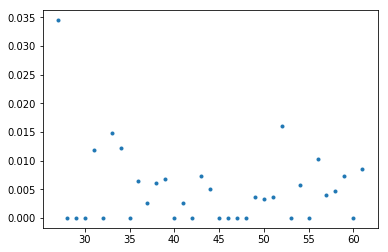

In [176]:
ageplot(Sarah_table1)

# Geraldine

In [76]:
Geraldine = CHILDESCorpusReader(corpus, 'Cornell/Geraldine/.*.xml')
Geraldinealldata=[]
for fileid in Geraldine.fileids():
    Geraldinedata=[Geraldine.age(fileid, month=True)[0],Geraldine.MLU(fileid)[0],len(Geraldine.words(fileid, speaker=['CHI'])),sum(totalpronoun(Geraldine,fileid)),sum(totalpronounmin(Geraldine,fileid)),sum(errornum(Geraldine,fileid))]
    Geraldinealldata.append(Geraldinedata)
from pandas import DataFrame  
Geraldine_table = DataFrame(Geraldinealldata)
Geraldine_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [77]:
Geraldine_table['%error'] = (Geraldine_table['#errors']/Geraldine_table['#cased_pronoun'])
Geraldine_table['group'] = Geraldine_table['age']
Geraldine_table.to_csv('Geraldine.csv', sep='\t')
Geraldine_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
0,18.0,1.350785,298,8,7,1,0.142857,18.0
1,18.0,1.792135,364,30,19,0,0.000000,18.0
4,20.0,1.840708,224,12,9,0,0.000000,20.0
2,NaN,1.995283,442,41,22,0,0.000000,NaN
6,26.0,2.325397,306,14,10,0,0.000000,26.0
3,19.0,2.326087,231,19,17,0,0.000000,19.0
5,23.0,3.895105,569,58,44,0,0.000000,23.0
9,29.0,4.426471,624,92,59,0,0.000000,29.0
8,28.0,4.525714,808,103,78,0,0.000000,28.0
7,26.0,5.484375,698,105,71,0,0.000000,26.0


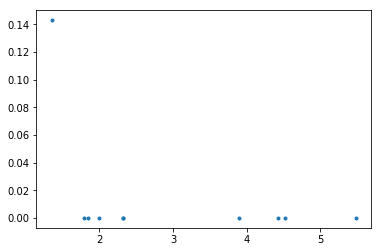

In [78]:
mluplot(Geraldine_table)

In [177]:
Geraldine_table1 = Geraldine_table.groupby(Geraldine_table['group']).sum()
Geraldine_table1['age'] = Geraldine_table['age'].groupby(Geraldine_table['group']).mean()
Geraldine_table1['mlu'] = Geraldine_table['mlu'].groupby(Geraldine_table['group']).mean()
Geraldine_table1['%error'] = (Geraldine_table1['#errors']/Geraldine_table1['#cased_pronoun'])

Geraldine_table1.to_csv('Geraldine.csv', mode='a', header=True)
Geraldine_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
18.0,18.0,1.571460,662,38,26,1,0.038462
19.0,19.0,2.326087,231,19,17,0,0.000000
20.0,20.0,1.840708,224,12,9,0,0.000000
23.0,23.0,3.895105,569,58,44,0,0.000000
26.0,26.0,3.904886,1004,119,81,0,0.000000
28.0,28.0,4.525714,808,103,78,0,0.000000
29.0,29.0,4.426471,624,92,59,0,0.000000


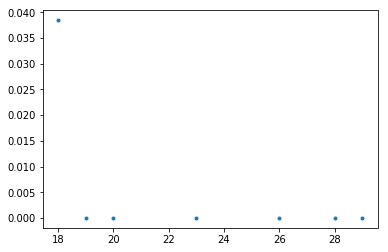

In [178]:
ageplot(Geraldine_table1)

# Trevor

In [81]:
Trevor = CHILDESCorpusReader(corpus, 'Demetras1/.*.xml')
Trevoralldata=[]
for fileid in Trevor.fileids():
    Trevordata=[Trevor.age(fileid, month=True)[0],Trevor.MLU(fileid)[0],len(Trevor.words(fileid, speaker=['CHI'])),sum(totalpronoun(Trevor,fileid)),sum(totalpronounmin(Trevor,fileid)),sum(errornum(Trevor,fileid))]
    Trevoralldata.append(Trevordata)
from pandas import DataFrame  
Trevor_table = DataFrame(Trevoralldata)
Trevor_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [82]:
Trevor_table['%error'] = (Trevor_table['#errors']/Trevor_table['#cased_pronoun'])
Trevor_table['group'] = Trevor_table['age']
Trevor_table.to_csv('Trevor.csv', sep='\t')
Trevor_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
21,47,4.264901,701,99,34,0,0.000000,47
2,25,4.273128,1113,74,47,0,0.000000,25
17,36,4.444444,566,44,20,0,0.000000,36
0,25,4.587097,817,49,33,0,0.000000,25
1,25,4.795918,1084,51,39,1,0.025641,25
20,39,4.813253,835,95,35,0,0.000000,39
7,30,4.872449,1040,52,32,0,0.000000,30
25,48,5.284810,882,85,51,0,0.000000,48
6,30,5.353293,987,57,33,0,0.000000,30
3,25,5.357542,990,89,70,0,0.000000,25


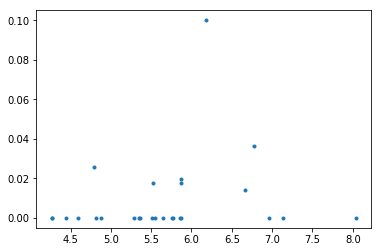

In [83]:
mluplot(Trevor_table)

In [179]:
Trevor_table1 = Trevor_table.groupby(Trevor_table['group']).sum()
Trevor_table1['age'] = Trevor_table['age'].groupby(Trevor_table['group']).mean()
Trevor_table1['mlu'] = Trevor_table['mlu'].groupby(Trevor_table['group']).mean()
Trevor_table1['%error'] = (Trevor_table1['#errors']/Trevor_table1['#cased_pronoun'])

Trevor_table1.to_csv('Trevor.csv', mode='a', header=True)
Trevor_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
25,25,4.753421,4004,263,189,1,0.005291
30,30,5.467258,4542,278,187,1,0.005348
32,32,5.945725,4825,351,217,1,0.004608
34,34,5.866242,972,115,57,1,0.017544
35,35,5.698106,1682,182,109,1,0.009174
36,36,5.922080,2456,244,131,5,0.038168
38,38,8.038462,1228,106,79,0,0.000000
39,39,5.230951,1915,236,113,0,0.000000
47,47,5.997967,2896,301,153,2,0.013072


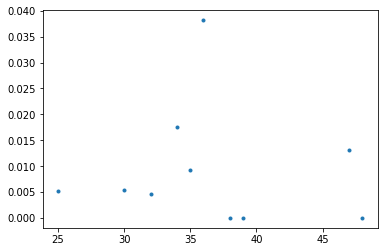

In [180]:
ageplot(Trevor_table1)


# Jimmy

In [87]:
Jimmy = CHILDESCorpusReader(corpus, 'Demetras2/Jimmy/.*.xml')
Jimmyalldata=[]
for fileid in Jimmy.fileids():
    Jimmydata=[Jimmy.age(fileid, month=True)[0],Jimmy.MLU(fileid)[0],len(Jimmy.words(fileid, speaker=['CHI'])),sum(totalpronoun(Jimmy,fileid)),sum(totalpronounmin(Jimmy,fileid)),sum(errornum(Jimmy,fileid))]
    Jimmyalldata.append(Jimmydata)
Jimmy_table = DataFrame(Jimmyalldata)
Jimmy_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [88]:
Jimmy_table['%error'] = (Jimmy_table['#errors']/Jimmy_table['#cased_pronoun'])
Jimmy_table['group'] = Jimmy_table['age']
Jimmy_table.to_csv('Jimmy.csv', sep='\t')
Jimmy_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
10,31,3.508850,801,60,39,1,0.025641,31
15,26,4.009804,857,68,51,0,0.000000,26
1,27,4.082126,889,99,79,0,0.000000,27
12,34,4.158416,876,99,58,0,0.000000,34
16,27,4.228571,906,96,85,0,0.000000,27
5,29,4.247788,988,68,48,0,0.000000,29
7,31,4.318182,282,35,26,0,0.000000,31
14,34,4.333333,834,90,55,0,0.000000,34
0,26,4.400901,1058,74,59,0,0.000000,26
23,34,4.447471,1167,115,84,1,0.011905,34


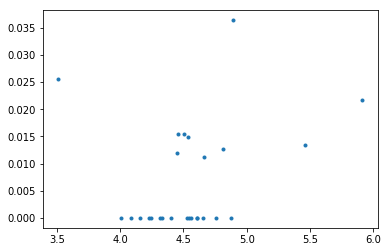

In [89]:
mluplot(Jimmy_table)

In [181]:
Jimmy_table1 = Jimmy_table.groupby(Jimmy_table['group']).sum()
Jimmy_table1['age'] = Jimmy_table['age'].groupby(Jimmy_table['group']).mean()
Jimmy_table1['mlu'] = Jimmy_table['mlu'].groupby(Jimmy_table['group']).mean()
Jimmy_table1['%error'] = (Jimmy_table1['#errors']/Jimmy_table1['#cased_pronoun'])

Jimmy_table1.to_csv('Jimmy.csv', mode='a', header=True)
Jimmy_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
26,26,4.205352,1915,142,110,0,0.000000
27,27,4.362265,3789,363,295,1,0.003390
29,29,4.604442,5756,389,284,1,0.003521
31,31,4.770093,5594,554,385,6,0.015584
33,33,4.453988,764,110,65,1,0.015385
34,34,4.459672,5797,683,454,3,0.006608


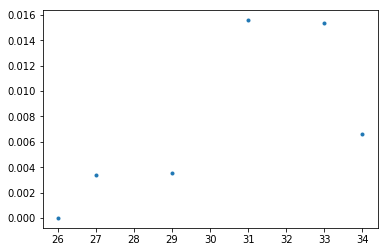

In [182]:
ageplot(Jimmy_table1)

# Steven

In [92]:
Steven = CHILDESCorpusReader(corpus, 'Feldman/.*.xml')
Stevenalldata=[]
for fileid in Steven.fileids():
    Stevendata=[Steven.age(fileid, month=True)[0],Steven.MLU(fileid)[0],len(Steven.words(fileid, speaker=['CHI'])),sum(totalpronoun(Steven,fileid)),sum(totalpronounmin(Steven,fileid)),sum(errornum(Steven,fileid))]
    Stevenalldata.append(Stevendata)
Steven_table = DataFrame(Stevenalldata)
Steven_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [93]:
Steven_table['%error'] = (Steven_table['#errors']/Steven_table['#cased_pronoun'])
Steven_table['group'] = Steven_table['age']
Steven_table.to_csv('Steven.csv', sep='\t')
Steven_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
6,NaN,0.000000,0,0,0,0,NaN,NaN
2,15.0,1.153846,50,0,0,0,NaN,15.0
4,15.0,1.285714,67,0,0,0,NaN,15.0
0,14.0,1.324324,56,0,0,0,NaN,14.0
1,14.0,1.441860,319,4,4,0,0.0,14.0
3,15.0,1.500000,16,0,0,0,NaN,15.0
8,23.0,1.784314,327,3,3,0,0.0,23.0
5,15.0,2.068966,78,0,0,0,NaN,15.0
9,26.0,2.206897,198,7,1,0,0.0,26.0
12,26.0,2.232558,137,4,1,0,0.0,26.0


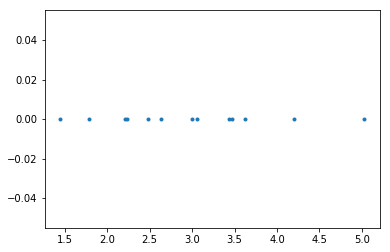

In [94]:
mluplot(Steven_table)

In [183]:
Steven_table1 = Steven_table.groupby(Steven_table['group']).sum()
Steven_table1['age'] = Steven_table['age'].groupby(Steven_table['group']).mean()
Steven_table1['mlu'] = Steven_table['mlu'].groupby(Steven_table['group']).mean()
Steven_table1['%error'] = (Steven_table1['#errors']/Steven_table1['#cased_pronoun'])

Steven_table1.to_csv('Steven.csv', mode='a', header=True)
Steven_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
14.0,14.0,1.383092,375,4,4,0,0.0
15.0,15.0,1.502131,211,0,0,0,NaN
17.0,17.0,2.333333,23,0,0,0,NaN
23.0,23.0,1.784314,327,3,3,0,0.0
26.0,26.0,2.872552,2268,81,44,0,0.0
27.0,27.0,3.816729,1446,47,30,0,0.0
28.0,28.0,5.029197,783,50,27,0,0.0


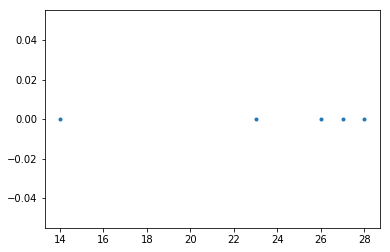

In [96]:
ageplot(Steven_table1)

# Abe

In [97]:
Abe = CHILDESCorpusReader(corpus, 'Kuczaj/.*.xml')
Abealldata=[]
for fileid in Abe.fileids():
    Abedata=[Abe.age(fileid, month=True)[0],Abe.MLU(fileid)[0],len(Abe.words(fileid, speaker=['CHI'])),sum(totalpronoun(Abe,fileid)),sum(totalpronounmin(Abe,fileid)),sum(errornum(Abe,fileid))]
    Abealldata.append(Abedata)
Abe_table = DataFrame(Abealldata)
Abe_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [98]:
Abe_table['%error'] = (Abe_table['#errors']/Abe_table['#cased_pronoun'])
Abe_table['group'] = Abe_table['age']
Abe_table.to_csv('Abe.csv', sep='\t')
Abe_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
7,30,3.677966,228,22,19,0,0.000000,30
6,30,4.120482,343,33,17,0,0.000000,30
4,29,4.411111,424,51,33,0,0.000000,29
1,29,4.518519,249,35,27,0,0.000000,29
3,29,4.525000,202,38,21,1,0.047619,29
46,34,4.726744,842,111,76,0,0.000000,34
0,29,4.769231,187,27,26,0,0.000000,29
11,30,4.833333,262,45,29,1,0.034483,30
14,30,4.884211,466,60,39,1,0.025641,30
10,30,4.920000,493,67,41,0,0.000000,30


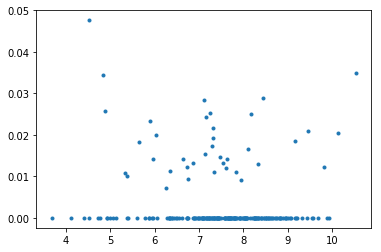

In [99]:
mluplot(Abe_table)

In [184]:
Abe_table1 = Abe_table.groupby(Abe_table['group']).sum()
Abe_table1['age'] = Abe_table['age'].groupby(Abe_table['group']).mean()
Abe_table1['mlu'] = Abe_table['mlu'].groupby(Abe_table['group']).mean()
Abe_table1['%error'] = (Abe_table1['#errors']/Abe_table1['#cased_pronoun'])

Abe_table1.to_csv('Abe.csv', mode='a', header=True)
Abe_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
29,29,4.669015,1412,194,139,1,0.007194
30,30,5.100852,4377,526,310,3,0.009677
31,31,5.975548,5149,698,496,3,0.006048
32,32,6.500380,4847,672,480,3,0.006250
33,33,7.241254,6205,943,646,2,0.003096
34,34,6.881999,8504,1333,898,5,0.005568
35,35,6.373542,8770,1299,822,2,0.002433
36,36,7.085262,4521,595,366,6,0.016393
37,37,8.247019,7946,1024,630,11,0.017460


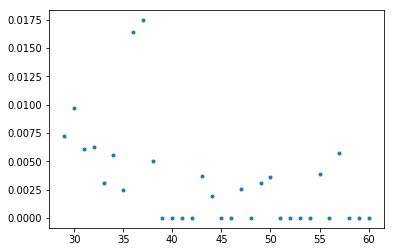

In [185]:
ageplot(Abe_table1)

# Seth

In [102]:
Seth = CHILDESCorpusReader(corpus, 'Peters/.*.xml')
Sethalldata=[]
for fileid in Seth.fileids():
    Sethdata=[Seth.age(fileid, month=True)[0],Seth.MLU(fileid)[0],len(Seth.words(fileid, speaker=['CHI'])),sum(totalpronoun(Seth,fileid)),sum(totalpronounmin(Seth,fileid)),sum(errornum(Seth,fileid))]
    Sethalldata.append(Sethdata)
Seth_table = DataFrame(Sethalldata)
Seth_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [104]:
Seth_table['%error'] = (Seth_table['#errors']/Seth_table['#cased_pronoun'])
Seth_table['group'] = Seth_table['age']
Seth_table.to_csv('Seth.csv', sep='\t')
Seth_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
0,16,1.031250,60,0,0,0,NaN,16
11,17,1.065217,176,1,1,0,0.000000,17
30,19,1.074380,223,0,0,0,NaN,19
12,17,1.080000,201,0,0,0,NaN,17
27,18,1.083333,187,0,0,0,NaN,18
26,18,1.120968,287,0,0,0,NaN,18
29,19,1.134328,210,0,0,0,NaN,19
4,16,1.134328,118,0,0,0,NaN,16
14,17,1.151515,64,0,0,0,NaN,17
31,19,1.155440,381,0,0,0,NaN,19


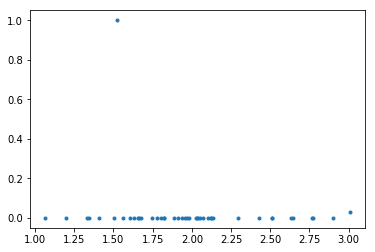

In [105]:
mluplot(Seth_table)

In [187]:
Seth_table1 = Seth_table.groupby(Seth_table['group']).sum()
Seth_table1['age'] = Seth_table['age'].groupby(Seth_table['group']).mean()
Seth_table1['mlu'] = Seth_table['mlu'].groupby(Seth_table['group']).mean()
Seth_table1['%error'] = (Seth_table1['#errors']/Seth_table1['#cased_pronoun'])

Seth_table1.to_csv('Seth.csv', mode='a', header=True)
Seth_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
16,16,1.426676,1175,2,2,0,0.000000
17,17,1.283697,1867,7,7,0,0.000000
18,18,1.261260,2716,1,1,0,0.000000
19,19,1.145177,1121,0,0,0,NaN
20,20,1.771642,848,2,0,0,NaN
21,21,1.678961,3913,77,7,0,0.000000
22,22,1.792351,6143,230,33,1,0.030303
23,23,1.966334,5040,150,24,0,0.000000
24,24,2.137343,4663,245,47,0,0.000000


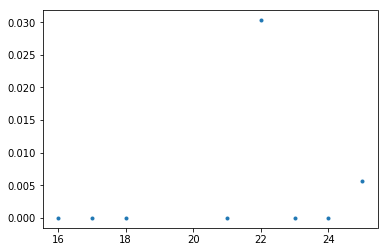

In [188]:
ageplot(Seth_table1)

# Vido

In [108]:
Vido = CHILDESCorpusReader(corpus, 'McCune/Vido/.*.xml')
Vidoalldata=[]
for fileid in Vido.fileids():
    Vidodata=[Vido.age(fileid, month=True)[0],Vido.MLU(fileid)[0],len(Vido.words(fileid, speaker=['CHI'])),sum(totalpronoun(Vido,fileid)),sum(totalpronounmin(Vido,fileid)),sum(errornum(Vido,fileid))]
    Vidoalldata.append(Vidodata)
Vido_table = DataFrame(Vidoalldata)
Vido_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [109]:
Vido_table['%error'] = (Vido_table['#errors']/Vido_table['#cased_pronoun'])
Vido_table['group'] = Vido_table['age']
Vido_table.to_csv('Vido.csv', sep='\t')
Vido_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
0,12.0,1.000000,1,0,0,0,NaN,12.0
1,NaN,1.096386,113,0,0,0,NaN,NaN
3,21.0,1.194118,237,2,0,0,NaN,21.0
2,20.0,1.234375,184,0,0,0,NaN,20.0
5,23.0,1.452555,222,13,5,0,0.0,23.0
4,22.0,1.495098,324,9,5,0,0.0,22.0


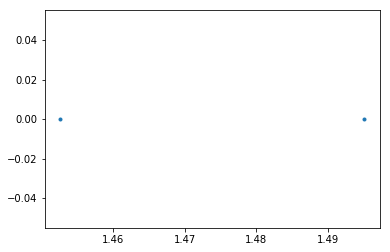

In [110]:
mluplot(Vido_table)

In [111]:
Vido_table1 = Vido_table.groupby(Vido_table['group']).sum()
Vido_table1['age'] = Vido_table['age'].groupby(Vido_table['group']).mean()
Vido_table1['mlu'] = Vido_table['mlu'].groupby(Vido_table['group']).mean()
Vido_table1.to_csv('Vido.csv', mode='a', header=True)
Vido_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
12.0,12.0,1.000000,1,0,0,0,NaN
20.0,20.0,1.234375,184,0,0,0,NaN
21.0,21.0,1.194118,237,2,0,0,NaN
22.0,22.0,1.495098,324,9,5,0,0.0
23.0,23.0,1.452555,222,13,5,0,0.0


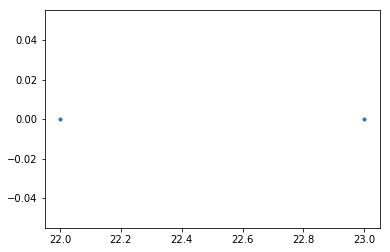

In [112]:
ageplot(Vido_table1)

# Lew

In [113]:
Lew = CHILDESCorpusReader(corpus, 'Post/Lew/.*.xml')
Lewalldata=[]
for fileid in Lew.fileids():
    Lewdata=[Lew.age(fileid, month=True)[0],Lew.MLU(fileid)[0],len(Lew.words(fileid, speaker=['CHI'])),sum(totalpronoun(Lew,fileid)),sum(totalpronounmin(Lew,fileid)),sum(errornum(Lew,fileid))]
    Lewalldata.append(Lewdata)
Lew_table = DataFrame(Lewalldata)
Lew_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [114]:
Lew_table['%error'] = (Lew_table['#errors']/Lew_table['#cased_pronoun'])
Lew_table['group'] = Lew_table['age']
Lew_table.to_csv('Lew.csv', sep='\t')
Lew_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
0,23,1.389313,345,0,0,0,NaN,23
4,27,1.457516,354,0,0,0,NaN,27
2,25,1.476190,310,3,2,0,0.000,25
3,26,1.600000,142,4,1,0,0.000,26
1,24,1.687500,377,1,1,0,0.000,24
5,28,1.750000,394,7,4,0,0.000,28
8,31,2.135417,518,20,13,0,0.000,31
7,30,2.269565,311,8,5,0,0.000,30
6,29,2.305556,451,9,8,1,0.125,29
9,32,2.904255,672,40,24,0,0.000,32


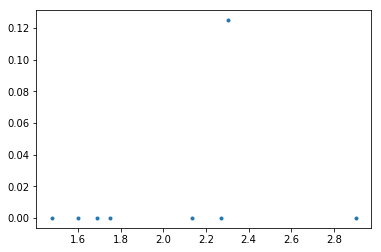

In [115]:
mluplot(Lew_table)

In [116]:
Lew_table1 = Lew_table.groupby(Lew_table['group']).sum()
Lew_table1['age'] = Lew_table['age'].groupby(Lew_table['group']).mean()
Lew_table1['mlu'] = Lew_table['mlu'].groupby(Lew_table['group']).mean()
Lew_table1.to_csv('Lew.csv', mode='a', header=True)
Lew_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
23,23,1.389313,345,0,0,0,NaN
24,24,1.687500,377,1,1,0,0.000
25,25,1.476190,310,3,2,0,0.000
26,26,1.600000,142,4,1,0,0.000
27,27,1.457516,354,0,0,0,NaN
28,28,1.750000,394,7,4,0,0.000
29,29,2.305556,451,9,8,1,0.125
30,30,2.269565,311,8,5,0,0.000
31,31,2.135417,518,20,13,0,0.000


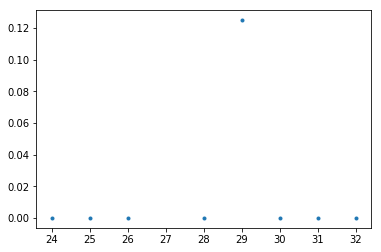

In [117]:
ageplot(Lew_table1)

# She

In [118]:
She = CHILDESCorpusReader(corpus, 'Post/She/.*.xml')
Shealldata=[]
for fileid in She.fileids():
    Shedata=[She.age(fileid, month=True)[0],She.MLU(fileid)[0],len(She.words(fileid, speaker=['CHI'])),sum(totalpronoun(She,fileid)),sum(totalpronounmin(She,fileid)),sum(errornum(She,fileid))]
    Shealldata.append(Shedata)
She_table = DataFrame(Shealldata)
She_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [119]:
She_table['%error'] = (She_table['#errors']/She_table['#cased_pronoun'])
She_table['group'] = She_table['age']
She_table.to_csv('She.csv', sep='\t')
She_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
0,20,2.229665,592,10,9,0,0.000000,20
1,21,2.469298,625,27,22,3,0.136364,21
4,24,2.866667,585,52,32,1,0.031250,24
6,26,2.937799,625,59,41,1,0.024390,26
3,23,2.941558,498,50,37,2,0.054054,23
2,22,3.142105,640,56,37,0,0.000000,22
7,27,3.280851,868,88,49,0,0.000000,27
8,28,3.450581,1244,172,94,0,0.000000,28
5,25,3.484375,220,24,20,0,0.000000,25
9,29,3.550000,871,127,93,2,0.021505,29


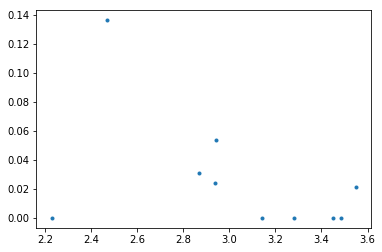

In [120]:
mluplot(She_table)

In [121]:
She_table1 = She_table.groupby(She_table['group']).sum()
She_table1['age'] = She_table['age'].groupby(She_table['group']).mean()
She_table1['mlu'] = She_table['mlu'].groupby(She_table['group']).mean()
She_table1.to_csv('She.csv', mode='a', header=True)
She_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
20,20,2.229665,592,10,9,0,0.000000
21,21,2.469298,625,27,22,3,0.136364
22,22,3.142105,640,56,37,0,0.000000
23,23,2.941558,498,50,37,2,0.054054
24,24,2.866667,585,52,32,1,0.031250
25,25,3.484375,220,24,20,0,0.000000
26,26,2.937799,625,59,41,1,0.024390
27,27,3.280851,868,88,49,0,0.000000
28,28,3.450581,1244,172,94,0,0.000000


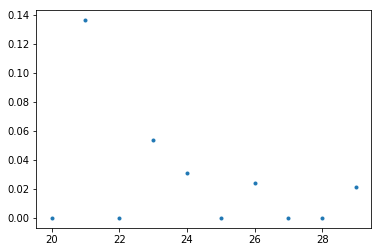

In [122]:
ageplot(She_table1)

# Tow

In [123]:
Tow = CHILDESCorpusReader(corpus, 'Post/Tow/.*.xml')
Towalldata=[]
for fileid in Tow.fileids():
    Towdata=[Tow.age(fileid, month=True)[0],Tow.MLU(fileid)[0],len(Tow.words(fileid, speaker=['CHI'])),sum(totalpronoun(Tow,fileid)),sum(totalpronounmin(Tow,fileid)),sum(errornum(Tow,fileid))]
    Towalldata.append(Towdata)
Tow_table = DataFrame(Towalldata)
Tow_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [124]:
Tow_table['%error'] = (Tow_table['#errors']/Tow_table['#cased_pronoun'])
Tow_table['group'] = Tow_table['age']
Tow_table.to_csv('Tow.csv', sep='\t')
Tow_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
0,19,1.871212,308,23,15,0,0.000000,19
1,20,2.413636,684,36,28,1,0.035714,20
3,22,2.789855,438,47,36,0,0.000000,22
5,25,2.804255,767,73,53,0,0.000000,25
2,21,2.870968,829,87,67,2,0.029851,21
6,26,3.208955,742,82,68,7,0.102941,26
4,24,3.322709,912,109,74,1,0.013514,24
8,28,3.920455,790,77,54,0,0.000000,28
7,27,3.966667,771,102,92,0,0.000000,27
9,29,5.067376,1445,187,150,1,0.006667,29


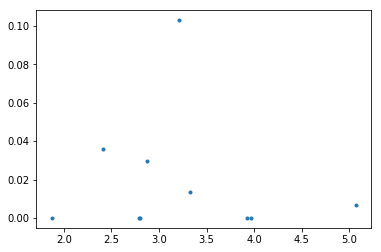

In [125]:
mluplot(Tow_table)

In [126]:
Tow_table1 = Tow_table.groupby(Tow_table['group']).sum()
Tow_table1['age'] = Tow_table['age'].groupby(Tow_table['group']).mean()
Tow_table1['mlu'] = Tow_table['mlu'].groupby(Tow_table['group']).mean()
Tow_table1.to_csv('Tow.csv', mode='a', header=True)
Tow_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
19,19,1.871212,308,23,15,0,0.000000
20,20,2.413636,684,36,28,1,0.035714
21,21,2.870968,829,87,67,2,0.029851
22,22,2.789855,438,47,36,0,0.000000
24,24,3.322709,912,109,74,1,0.013514
25,25,2.804255,767,73,53,0,0.000000
26,26,3.208955,742,82,68,7,0.102941
27,27,3.966667,771,102,92,0,0.000000
28,28,3.920455,790,77,54,0,0.000000


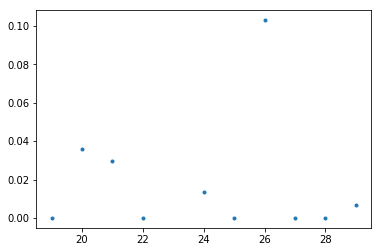

In [127]:
ageplot(Tow_table1)

# Noami

In [128]:
Noami = CHILDESCorpusReader(corpus, 'Sachs/.*.xml')
Noamialldata=[]
for fileid in Noami.fileids():
    Noamidata=[Noami.age(fileid, month=True)[0],Noami.MLU(fileid)[0],len(Noami.words(fileid, speaker=['CHI'])),sum(totalpronoun(Noami,fileid)),sum(totalpronounmin(Noami,fileid)),sum(errornum(Noami,fileid))]
    Noamialldata.append(Noamidata)
Noami_table = DataFrame(Noamialldata)
Noami_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [129]:
Noami_table['%error'] = (Noami_table['#errors']/Noami_table['#cased_pronoun'])
Noami_table['group'] = Noami_table['age']
Noami_table.to_csv('Noami.csv', sep='\t')
Noami_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
3,20,1.301724,197,1,0,0,NaN,20
1,19,1.550265,747,17,13,0,0.000000,19
2,20,1.637931,271,3,3,0,0.000000,20
79,36,1.725806,134,11,4,1,0.250000,36
5,21,1.750000,62,0,0,0,NaN,21
12,22,1.819048,278,30,16,0,0.000000,22
4,21,1.825000,101,0,0,0,NaN,21
8,22,1.849206,288,18,5,0,0.000000,22
11,22,1.872881,387,48,21,0,0.000000,22
6,21,1.882353,64,1,1,0,0.000000,21


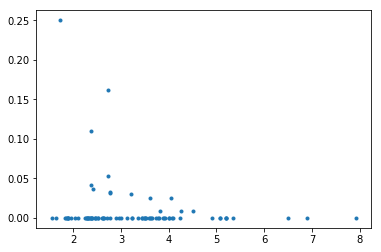

In [130]:
mluplot(Noami_table)

In [189]:
Noami_table1 = Noami_table.groupby(Noami_table['group']).sum()
Noami_table1['age'] = Noami_table['age'].groupby(Noami_table['group']).mean()
Noami_table1['mlu'] = Noami_table['mlu'].groupby(Noami_table['group']).mean()
Noami_table1['%error'] = (Noami_table1['#errors']/Noami_table1['#cased_pronoun'])

Noami_table1.to_csv('Noami.csv', mode='a', header=True)
Noami_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
15,15,2.285714,68,5,5,0,0.000000
19,19,1.550265,747,17,13,0,0.000000
20,20,1.469828,468,4,3,0,0.000000
21,21,1.819118,227,1,1,0,0.000000
22,22,1.887850,1639,103,46,0,0.000000
23,23,2.340239,4533,446,218,0,0.000000
24,24,2.561715,3536,376,129,5,0.038760
25,25,2.409854,3833,319,186,10,0.053763
26,26,2.601770,1903,228,119,3,0.025210


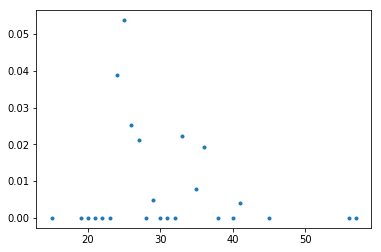

In [190]:
ageplot(Noami_table1)

# Nathaniel

In [133]:
Nathaniel = CHILDESCorpusReader(corpus, 'Snow/.*.xml')
Nathanielalldata=[]
for fileid in Nathaniel.fileids():
    Nathanieldata=[Nathaniel.age(fileid, month=True)[0],Nathaniel.MLU(fileid)[0],len(Nathaniel.words(fileid, speaker=['CHI'])),sum(totalpronoun(Nathaniel,fileid)),sum(totalpronounmin(Nathaniel,fileid)),sum(errornum(Nathaniel,fileid))]
    Nathanielalldata.append(Nathanieldata)
Nathaniel_table = DataFrame(Nathanielalldata)
Nathaniel_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [134]:
Nathaniel_table['%error'] = (Nathaniel_table['#errors']/Nathaniel_table['#cased_pronoun'])
Nathaniel_table['group'] = Nathaniel_table['age']
Nathaniel_table.to_csv('Nathaniel.csv', sep='\t')
Nathaniel_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
35,37,1.842105,186,6,5,0,0.000000,37
0,30,3.112840,801,8,5,0,0.000000,30
1,30,3.128620,3642,77,19,0,0.000000,30
27,35,3.200000,254,1,0,0,NaN,35
21,33,3.200000,254,1,0,0,NaN,33
6,30,3.516393,437,9,4,0,0.000000,30
8,31,3.569832,690,9,7,0,0.000000,31
10,31,3.603352,690,9,7,0,0.000000,31
2,30,3.618449,1756,51,7,0,0.000000,30
11,31,3.621993,4445,82,33,0,0.000000,31


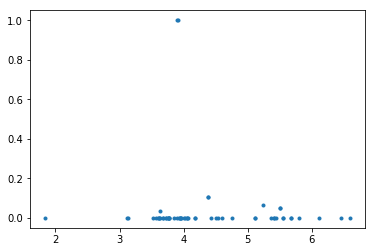

In [135]:
mluplot(Nathaniel_table)

In [191]:
Nathaniel_table1 = Nathaniel_table.groupby(Nathaniel_table['group']).sum()
Nathaniel_table1['age'] = Nathaniel_table['age'].groupby(Nathaniel_table['group']).mean()
Nathaniel_table1['mlu'] = Nathaniel_table['mlu'].groupby(Nathaniel_table['group']).mean()
Nathaniel_table1['%error'] = (Nathaniel_table1['#errors']/Nathaniel_table1['#cased_pronoun'])

Nathaniel_table1.to_csv('Nathaniel.csv', mode='a', header=True)
Nathaniel_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
30,30,3.608771,10650,191,47,0,0.000000
31,31,3.881244,16660,319,170,0,0.000000
32,32,4.215145,2124,59,39,5,0.128205
33,33,3.713919,4600,145,66,0,0.000000
34,34,3.910714,274,1,1,1,1.000000
35,35,3.558555,1448,69,20,0,0.000000
37,37,4.606991,7506,565,385,4,0.010390
39,39,5.383521,5510,486,324,0,0.000000
40,40,4.769965,8509,423,278,0,0.000000


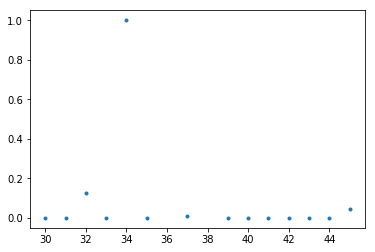

In [192]:
ageplot(Nathaniel_table1)

# Nina

In [138]:
Nina = CHILDESCorpusReader(corpus, 'Suppes/.*.xml')
Ninaalldata=[]
for fileid in Nina.fileids():
    Ninadata=[Nina.age(fileid, month=True)[0],Nina.MLU(fileid)[0],len(Nina.words(fileid, speaker=['CHI'])),sum(totalpronoun(Nina,fileid)),sum(totalpronounmin(Nina,fileid)),sum(errornum(Nina,fileid))]
    Ninaalldata.append(Ninadata)
Nina_table = DataFrame(Ninaalldata)
Nina_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [139]:
Nina_table['%error'] = (Nina_table['#errors']/Nina_table['#cased_pronoun'])
Nina_table['group'] = Nina_table['age']
Nina_table.to_csv('Nina.csv', sep='\t')
Nina_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
0,24,2.253782,1483,17,2,0,0.000000,24
1,24,2.401496,1081,17,4,0,0.000000,24
7,25,2.450495,1209,43,27,3,0.111111,25
5,25,2.521739,575,22,3,0,0.000000,25
3,24,2.539526,1371,27,8,0,0.000000,24
6,25,2.670000,1698,68,18,1,0.055556,25
4,24,2.674330,850,39,12,0,0.000000,24
2,24,2.910072,1781,18,8,0,0.000000,24
8,25,2.912568,1841,143,100,0,0.000000,25
9,26,2.959911,1589,109,77,0,0.000000,26


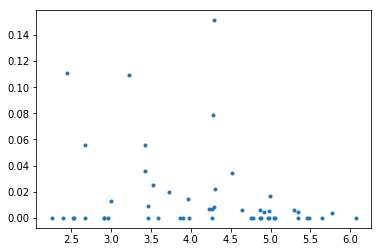

In [140]:
mluplot(Nina_table)

In [193]:
Nina_table1 = Nina_table.groupby(Nina_table['group']).sum()
Nina_table1['age'] = Nina_table['age'].groupby(Nina_table['group']).mean()
Nina_table1['mlu'] = Nina_table['mlu'].groupby(Nina_table['group']).mean()
Nina_table1['%error'] = (Nina_table1['#errors']/Nina_table1['#cased_pronoun'])

Nina_table1.to_csv('Nina.csv', mode='a', header=True)
Nina_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
24,24,2.555841,6566,118,34,0,0.000000
25,25,2.638701,5323,276,148,4,0.027027
26,26,3.151276,7049,592,441,20,0.045351
27,27,4.007554,6340,532,367,8,0.021798
28,28,3.754109,6562,693,450,5,0.011111
29,29,3.525630,2734,283,187,0,0.000000
30,30,4.111778,10778,1192,976,57,0.058402
33,33,4.287330,1961,173,120,1,0.008333
34,34,4.689109,9610,918,625,3,0.004800


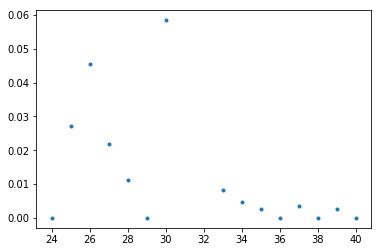

In [194]:
ageplot(Nina_table1)

# Ben

In [143]:
Ben = CHILDESCorpusReader(corpus, 'Weist/Ben/.*.xml')
Benalldata=[]
for fileid in Ben.fileids():
    Bendata=[Ben.age(fileid, month=True)[0],Ben.MLU(fileid)[0],len(Ben.words(fileid, speaker=['CHI'])),sum(totalpronoun(Ben,fileid)),sum(totalpronounmin(Ben,fileid)),sum(errornum(Ben,fileid))]
    Benalldata.append(Bendata)
Ben_table = DataFrame(Benalldata)
Ben_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [144]:
Ben_table['%error'] = (Ben_table['#errors']/Ben_table['#cased_pronoun'])
Ben_table['group'] = Ben_table['age']
Ben_table.to_csv('Ben.csv', sep='\t')
Ben_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
0,28,4.952381,1123,124,110,0,0.000000,28
1,28,5.206897,1338,121,87,0,0.000000,28
2,29,5.212245,1207,150,133,1,0.007519,29
5,32,5.217054,1319,113,66,8,0.121212,32
6,33,5.371429,1156,108,71,1,0.014085,33
4,29,5.510917,1185,137,106,2,0.018868,29
8,35,5.995984,1502,160,118,1,0.008475,35
3,29,6.233533,910,90,75,2,0.026667,29
10,40,6.541850,1430,189,149,2,0.013423,40
9,39,6.572193,1141,156,119,1,0.008403,39


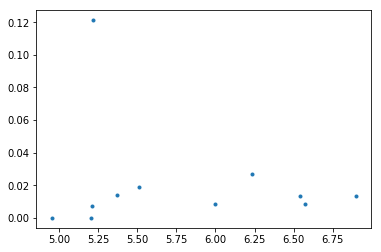

In [145]:
mluplot(Ben_table)

In [196]:
Ben_table1 = Ben_table.groupby(Ben_table['group']).sum()
Ben_table1['age'] = Ben_table['age'].groupby(Ben_table['group']).mean()
Ben_table1['mlu'] = Ben_table['mlu'].groupby(Ben_table['group']).mean()
Ben_table1['%error'] = (Ben_table1['#errors']/Ben_table1['#cased_pronoun'])

Ben_table1.to_csv('Ben.csv', mode='a', header=True)
Ben_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
28,28,5.079639,2461,245,197,0,0.000000
29,29,5.652232,3302,377,314,5,0.015924
32,32,5.217054,1319,113,66,8,0.121212
33,33,5.371429,1156,108,71,1,0.014085
34,34,6.899038,1419,111,73,1,0.013699
35,35,5.995984,1502,160,118,1,0.008475
39,39,6.572193,1141,156,119,1,0.008403
40,40,6.541850,1430,189,149,2,0.013423


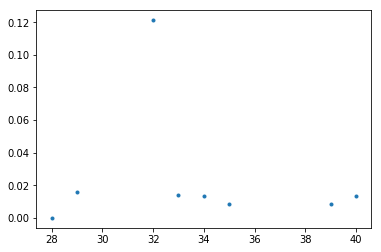

In [197]:
ageplot(Ben_table1)

# Emily

In [148]:
Emily = CHILDESCorpusReader(corpus, 'Weist/Emily/.*.xml')
Emilyalldata=[]
for fileid in Emily.fileids():
    Emilydata=[Emily.age(fileid, month=True)[0],Emily.MLU(fileid)[0],len(Emily.words(fileid, speaker=['CHI'])),sum(totalpronoun(Emily,fileid)),sum(totalpronounmin(Emily,fileid)),sum(errornum(Emily,fileid))]
    Emilyalldata.append(Emilydata)
Emily_table = DataFrame(Emilyalldata)
Emily_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [149]:
Emily_table['%error'] = (Emily_table['#errors']/Emily_table['#cased_pronoun'])
Emily_table['group'] = Emily_table['age']
Emily_table.to_csv('Emily.csv', sep='\t')
Emily_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
3,32,4.639130,1022,128,118,0,0.000000,32
0,30,4.724846,2241,382,254,1,0.003937,30
1,31,4.881910,1829,252,175,1,0.005714,31
4,32,5.405882,855,134,107,1,0.009346,32
20,52,5.433476,1201,134,87,0,0.000000,52
11,36,5.540373,858,89,56,0,0.000000,36
5,32,5.544061,1341,174,119,1,0.008403,32
19,51,5.591133,1094,126,80,0,0.000000,51
9,35,5.970443,1152,144,90,2,0.022222,35
22,54,6.087719,982,124,89,0,0.000000,54


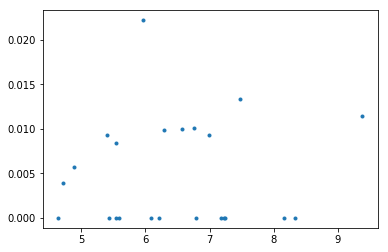

In [150]:
mluplot(Emily_table)

In [198]:
Emily_table1 = Emily_table.groupby(Emily_table['group']).sum()
Emily_table1['age'] = Emily_table['age'].groupby(Emily_table['group']).mean()
Emily_table1['mlu'] = Emily_table['mlu'].groupby(Emily_table['group']).mean()
Emily_table1['%error'] = (Emily_table1['#errors']/Emily_table1['#cased_pronoun'])

Emily_table1.to_csv('Emily.csv', mode='a', header=True)
Emily_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
30,30,4.724846,2241,382,254,1,0.003937
31,31,6.026425,3312,427,298,1,0.003356
32,32,5.196358,3218,436,344,2,0.005814
33,33,7.235808,1513,206,151,0,0.000000
34,34,6.778829,2521,332,207,2,0.009662
35,35,6.379830,2455,307,208,2,0.009615
36,36,6.379341,2753,379,254,0,0.000000
37,37,6.839167,3440,465,311,2,0.006431
38,38,6.292683,1299,156,101,1,0.009901


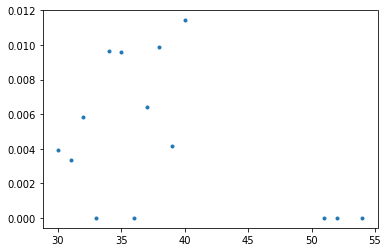

In [199]:
ageplot(Emily_table1)

# Emma

In [153]:
Emma = CHILDESCorpusReader(corpus, 'Weist/Emma/.*.xml')
Emmaalldata=[]
for fileid in Emma.fileids():
    Emmadata=[Emma.age(fileid, month=True)[0],Emma.MLU(fileid)[0],len(Emma.words(fileid, speaker=['CHI'])),sum(totalpronoun(Emma,fileid)),sum(totalpronounmin(Emma,fileid)),sum(errornum(Emma,fileid))]
    Emmaalldata.append(Emmadata)
Emma_table = DataFrame(Emmaalldata)
Emma_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [154]:
Emma_table['%error'] = (Emma_table['#errors']/Emma_table['#cased_pronoun'])
Emma_table['group'] = Emma_table['age']
Emma_table.to_csv('Emma.csv', sep='\t')
Emma_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
27,58,0.000000,0,0,0,0,NaN,58
0,31,3.686131,493,52,32,0,0.000000,31
21,50,4.384615,1001,79,46,0,0.000000,50
1,32,4.567797,547,66,40,1,0.025000,32
14,41,4.624161,698,89,52,0,0.000000,41
13,39,4.661458,898,141,92,0,0.000000,39
2,33,4.819549,633,49,38,0,0.000000,33
4,33,4.850000,489,56,44,0,0.000000,33
22,51,4.913514,813,67,44,0,0.000000,51
15,43,4.937238,1128,138,108,0,0.000000,43


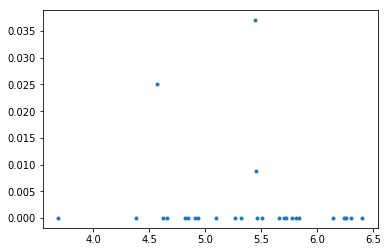

In [155]:
mluplot(Emma_table)

In [200]:
Emma_table1 = Emma_table.groupby(Emma_table['group']).sum()
Emma_table1['age'] = Emma_table['age'].groupby(Emma_table['group']).mean()
Emma_table1['mlu'] = Emma_table['mlu'].groupby(Emma_table['group']).mean()
Emma_table1['%error'] = (Emma_table1['#errors']/Emma_table1['#cased_pronoun'])

Emma_table1.to_csv('Emma.csv', mode='a', header=True)
Emma_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
31,31,3.686131,493,52,32,0,0.000000
32,32,4.567797,547,66,40,1,0.025000
33,33,5.037998,1774,153,109,1,0.009174
34,34,6.238095,929,96,52,0,0.000000
35,35,5.708861,1295,171,102,0,0.000000
36,36,6.109167,1959,200,117,0,0.000000
38,38,5.514897,2505,281,204,0,0.000000
39,39,5.160626,1428,215,149,0,0.000000
41,41,4.624161,698,89,52,0,0.000000


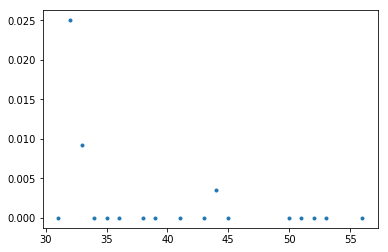

In [201]:
ageplot(Emma_table1)

# Jillian

In [158]:
Jillian = CHILDESCorpusReader(corpus, 'Weist/Jillian/.*.xml')
Jillianalldata=[]
for fileid in Jillian.fileids():
    Jilliandata=[Jillian.age(fileid, month=True)[0],Jillian.MLU(fileid)[0],len(Jillian.words(fileid, speaker=['CHI'])),sum(totalpronoun(Jillian,fileid)),sum(totalpronounmin(Jillian,fileid)),sum(errornum(Jillian,fileid))]
    Jillianalldata.append(Jilliandata)
Jillian_table = DataFrame(Jillianalldata)
Jillian_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [159]:
Jillian_table['%error'] = (Jillian_table['#errors']/Jillian_table['#cased_pronoun'])
Jillian_table['group'] = Jillian_table['age']
Jillian_table.to_csv('Jillian.csv', sep='\t')
Jillian_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
4,26,2.768000,385,28,18,0,0.000000,26
2,26,3.398230,400,37,28,0,0.000000,26
5,26,3.774510,386,38,28,0,0.000000,26
1,25,3.840237,646,50,29,0,0.000000,25
3,26,3.902913,415,54,43,0,0.000000,26
0,25,3.957895,390,37,29,0,0.000000,25
14,30,4.356828,1052,122,68,0,0.000000,30
9,28,4.493450,1054,74,56,0,0.000000,28
20,34,4.712766,881,107,86,0,0.000000,34
15,30,4.886555,1136,98,71,0,0.000000,30


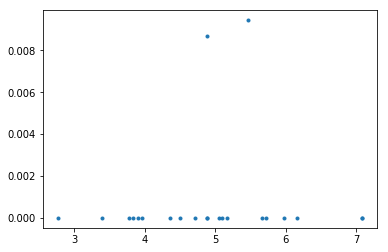

In [160]:
mluplot(Jillian_table)

In [202]:
Jillian_table1 = Jillian_table.groupby(Jillian_table['group']).sum()
Jillian_table1['age'] = Jillian_table['age'].groupby(Jillian_table['group']).mean()
Jillian_table1['mlu'] = Jillian_table['mlu'].groupby(Jillian_table['group']).mean()
Jillian_table1['%error'] = (Jillian_table1['#errors']/Jillian_table1['#cased_pronoun'])

Jillian_table1.to_csv('Jillian.csv', mode='a', header=True)
Jillian_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
25,25,3.899066,1036,87,58,0,0.000000
26,26,3.460913,1586,157,117,0,0.000000
28,28,5.656516,5233,494,408,0,0.000000
29,29,5.228809,3607,353,279,1,0.003584
30,30,4.710257,3263,380,254,1,0.003937
31,31,6.254911,3708,413,271,0,0.000000
34,34,4.903904,2059,254,191,0,0.000000


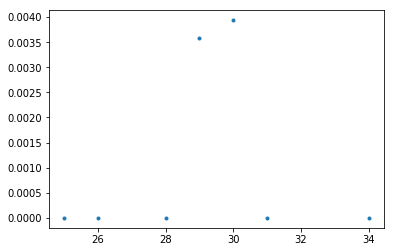

In [203]:
ageplot(Jillian_table1)

# Matt

In [163]:
Matt = CHILDESCorpusReader(corpus, 'Weist/Matt/.*.xml')
Mattalldata=[]
for fileid in Matt.fileids():
    Mattdata=[Matt.age(fileid, month=True)[0],Matt.MLU(fileid)[0],len(Matt.words(fileid, speaker=['CHI'])),sum(totalpronoun(Matt,fileid)),sum(totalpronounmin(Matt,fileid)),sum(errornum(Matt,fileid))]
    Mattalldata.append(Mattdata)
Matt_table = DataFrame(Mattalldata)
Matt_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [164]:
Matt_table['%error'] = (Matt_table['#errors']/Matt_table['#cased_pronoun'])
Matt_table['group'] = Matt_table['age']
Matt_table.to_csv('Matt.csv', sep='\t')
Matt_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
53,58,0.000000,0,0,0,0,NaN,58
49,56,0.000000,0,0,0,0,NaN,56
4,28,2.849624,380,29,10,0,0.000000,28
0,27,2.887218,372,23,5,0,0.000000,27
3,28,2.956522,493,25,9,0,0.000000,28
1,28,2.964029,425,39,7,0,0.000000,28
8,30,3.351724,489,31,14,1,0.071429,30
5,29,3.478261,508,42,30,4,0.133333,29
6,29,3.541935,570,46,34,3,0.088235,29
7,29,3.622378,510,42,24,0,0.000000,29


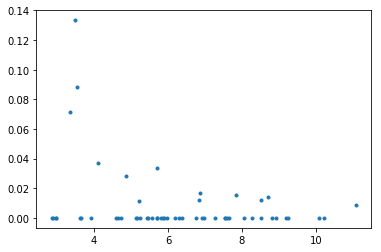

In [165]:
mluplot(Matt_table)

In [204]:
Matt_table1 = Matt_table.groupby(Matt_table['group']).sum()
Matt_table1['age'] = Matt_table['age'].groupby(Matt_table['group']).mean()
Matt_table1['mlu'] = Matt_table['mlu'].groupby(Matt_table['group']).mean()
Matt_table1['%error'] = (Matt_table1['#errors']/Matt_table1['#cased_pronoun'])

Matt_table1.to_csv('Matt.csv', mode='a', header=True)
Matt_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
27,27,2.887218,372,23,5,0,0.000000
28,28,3.100877,1725,128,35,0,0.000000
29,29,3.547525,1588,130,88,7,0.079545
30,30,3.723633,1141,123,68,3,0.044118
31,31,4.649351,690,82,50,0,0.000000
32,32,5.279262,1851,269,161,5,0.031056
33,33,5.224397,1495,177,127,1,0.007874
34,34,4.714286,402,40,30,0,0.000000
36,36,6.221096,1888,269,190,2,0.010526


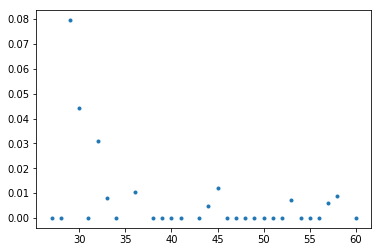

In [205]:
ageplot(Matt_table1)

# Roman

In [168]:
Roman = CHILDESCorpusReader(corpus, 'Weist/Roman/.*.xml')
Romanalldata=[]
for fileid in Roman.fileids():
    Romandata=[Roman.age(fileid, month=True)[0],Roman.MLU(fileid)[0],len(Roman.words(fileid, speaker=['CHI'])),sum(totalpronoun(Roman,fileid)),sum(totalpronounmin(Roman,fileid)),sum(errornum(Roman,fileid))]
    Romanalldata.append(Romandata)
Roman_table = DataFrame(Romanalldata)
Roman_table.columns = ['age', 'mlu','#words','#pronouns','#cased_pronoun','#errors']

In [169]:
Roman_table['%error'] = (Roman_table['#errors']/Roman_table['#cased_pronoun'])
Roman_table['group'] = Roman_table['age']
Roman_table.to_csv('Roman.csv', sep='\t')
Roman_table.sort_values('mlu')

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error,group
1,27,2.984848,211,8,8,0,0.000000,27
0,27,3.261745,460,24,22,0,0.000000,27
2,29,3.409091,151,11,9,0,0.000000,29
3,29,3.589109,744,79,71,0,0.000000,29
4,30,4.018088,1538,154,120,0,0.000000,30
5,30,4.069672,1035,140,100,0,0.000000,30
10,32,4.154321,705,63,45,0,0.000000,32
12,33,4.480447,819,83,56,0,0.000000,33
15,34,4.798611,777,64,50,0,0.000000,34
8,31,4.929487,762,72,40,0,0.000000,31


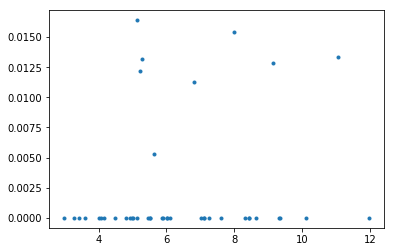

In [170]:
mluplot(Roman_table)

In [208]:
Roman_table1 = Roman_table.groupby(Roman_table['group']).sum()
Roman_table1['age'] = Roman_table['age'].groupby(Roman_table['group']).mean()
Roman_table1['mlu'] = Roman_table['mlu'].groupby(Roman_table['group']).mean()
Roman_table1['%error'] = (Roman_table1['#errors']/Roman_table1['#cased_pronoun'])
Roman_table1.to_csv('Roman.csv', mode='a', header=True)

Roman_table1

,age,mlu,#words,#pronouns,#cased_pronoun,#errors,%error
group,,,,,,,
27,27,3.123297,671,32,30,0,0.000000
29,29,3.499100,895,90,80,0,0.000000
30,30,4.612839,4672,496,363,2,0.005510
31,31,5.033709,1784,200,111,0,0.000000
32,32,4.154321,705,63,45,0,0.000000
33,33,5.160752,2680,263,192,0,0.000000
34,34,5.033077,1982,157,126,1,0.007937
36,36,5.010101,532,59,43,0,0.000000
37,37,5.462264,616,86,66,0,0.000000


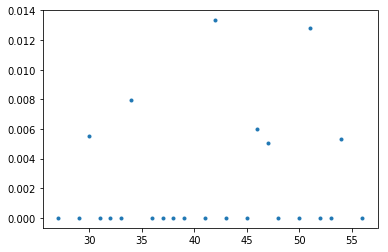

In [209]:
ageplot(Roman_table1)